# Testing analytics and modelling

For this we will be doing some testing of different modelling techniques and seeing whether anything works.

## Data importing

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
climate = pd.read_csv('clean data/climate_factors.csv', index_col='Unnamed: 0')
socio = pd.read_csv('clean data/socioec_factors.csv', index_col='Unnamed: 0')
wstress = pd.read_csv('clean data/water_stress.csv')
countries = pd.read_csv('shared_country_codes.csv')
countries = list(countries['0'])

## Checking the clean data

Need to remove the unnecessary countries from the datasets using the shared countries information. And then see what the situation is with the NANs.

In [8]:
climate = climate[climate['Country'].isin(countries)]
climate.isnull().sum().reset_index().rename(columns={'index':'Variables',0:'# NaN'})

,Variables,# NaN
0,Country,0
1,Temp,0
2,Rain,0
3,IRWR,0
4,ERWR,0
5,TRWR,0
6,Dep_ratio,1


Checking which countries are those that have NANs in the columns that have few NANs.

In [9]:
#climate = climate.drop(climate.columns[[6]], axis = 1)
climate[climate.isna().any(axis = 1)]

,Country,Temp,Rain,IRWR,ERWR,TRWR,Dep_ratio
172,SYC,27.674428,1648.542325,0.0,0.0,0.0,NaN


In [10]:
socio = socio[socio['Country'].isin(countries)]
socio.isnull().sum().reset_index().rename(columns={'index':'Variables',0:'# NaN'})

,Variables,# NaN
0,Country,0
1,rural_pop,0
2,urban_pop,0
3,HDI,0
4,r_u,0
5,r_u_access,0
6,pop_growth,0
7,mort_rate,0
8,GDP_pcp,3
9,life_ex,0


Checking the NAs in the socio economic data

In [12]:
socio[socio.isna().any(axis = 1)]

,Country,rural_pop,urban_pop,HDI,r_u,r_u_access,pop_growth,mort_rate,GDP_pcp,life_ex
121,SYR,8495.489,9774.379,0.544,0.869159,0.944745,-3.60,17.8,NaN,70.2
135,VEN,3778.814,28198.251,0.735,0.134009,0.820000,0.02,17.6,NaN,72.6
138,YEM,18075.808,10174.612,0.463,1.776560,0.645833,2.58,43.0,NaN,66.0


Checking which countries are those that have NANs in the columns that have few NANs.

In [13]:
wstress = wstress[wstress['Country'].isin(countries)]
wstress.isnull().sum()

wstress[wstress.isna().any(axis=1)]

,Country,WS_MDG,WUE_SDG,WS_SDG
43,DJI,6.333333,NaN,6.333333
64,GNQ,0.076154,NaN,0.183503
66,GRD,7.050000,NaN,7.050000
104,MDV,15.666667,NaN,15.666667
130,PNG,0.048951,NaN,0.132243
156,SYC,NaN,89.323035,NaN


## Exploring the data

First need to merge the explanatory datasets (climate and socio economic) with the target dataset.


In [14]:
allclimate = pd.merge(climate, wstress, on = 'Country', how = 'outer')
#allclimate = allclimate.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])
allclimate = allclimate.drop(allclimate[allclimate['Country'] == 'SYC'].index)
allclimate.isna().sum()

Country      0
Temp         0
Rain         0
IRWR         0
ERWR         0
TRWR         0
Dep_ratio    0
WS_MDG       0
WUE_SDG      5
WS_SDG       0
dtype: int64

In [15]:
cols = list(allclimate.columns)
#cols.remove('Country')
cols

['Country',
 'Temp',
 'Rain',
 'IRWR',
 'ERWR',
 'TRWR',
 'Dep_ratio',
 'WS_MDG',
 'WUE_SDG',
 'WS_SDG']

In [16]:
allsocio = pd.merge(socio, wstress, on = 'Country', how = 'outer')
allsocio = allsocio.drop(allsocio[allsocio['Country'] == 'SYC'].index)
allsocio.isna().sum()

Country       0
rural_pop     0
urban_pop     0
HDI           0
r_u           0
r_u_access    0
pop_growth    0
mort_rate     0
GDP_pcp       3
life_ex       0
WS_MDG        0
WUE_SDG       5
WS_SDG        0
dtype: int64

## Exploratory plots

We can plot the explanatory variables against the potential target variables. 

### Climate data plots

In [20]:
cols = list(allclimate.columns)
#cols.remove('Country')
climate_exp_cols = cols
climate_exp_cols.remove('WS_MDG')
climate_exp_cols.remove('WUE_SDG')
climate_exp_cols.remove('WS_SDG')
climate_exp_cols.remove('Country')

climate_expl_choice = widgets.Dropdown(
    options=climate_exp_cols,
    value=climate_exp_cols[0],
    description='Value:',
    disabled=False,
)

trgt_cols = ['WS_MDG', 'WUE_SDG', 'WS_SDG']

climate_trgt_choice = widgets.Dropdown(
    options = trgt_cols,
    value = trgt_cols[0],
    description = 'Value:',
    disabled = False,
)

climate_log_choice = widgets.Dropdown(
    options = ['None', 'Target', 'Explanatory', 'Both'],
    value = 'None',
    description = 'Selection:',
    disabled = False
)

selection = widgets.Accordion(children=[climate_expl_choice, climate_trgt_choice, climate_log_choice])
selection.set_title(0, 'Explanatory variable')
selection.set_title(1, 'Target variable')
selection.set_title(2, 'Take log of variables')
selection

Accordion(children=(Dropdown(description='Value:', options=('Temp', 'Rain', 'IRWR', 'ERWR', 'TRWR', 'Dep_ratio…

Text(0.5, 1.0, 'Climate data exploratory plot')

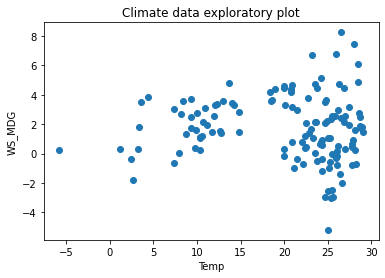

In [21]:
if climate_log_choice.value == 'None':
    plt.scatter(x = allclimate[climate_expl_choice.value], y = (allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Target':
    plt.scatter(x = allclimate[climate_expl_choice.value], y = np.log(allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Explanatory':
    plt.scatter(x = np.log(allclimate[climate_expl_choice.value]), y = (allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Both':
    plt.scatter(x = np.log(allclimate[climate_expl_choice.value]), y = np.log(allclimate[climate_trgt_choice.value]))
plt.xlabel(climate_expl_choice.value)
plt.ylabel(climate_trgt_choice.value)
plt.title('Climate data exploratory plot')

If we play around with the plots we can see that the target variables have a distribution with many small values and a few very large values. If we take the *log()* of the target values the plots look a lot better and much more readable. This is something that we should keep in mind when creating model, especially regression models.

All the water resource explanatory variables suffer from a similar problem of having varied values with many small values and a few very large values.

### Socio economic data plots

In [22]:
cols = list(allsocio.columns)
socio_exp_cols = cols
socio_exp_cols.remove('WS_MDG')
socio_exp_cols.remove('WUE_SDG')
socio_exp_cols.remove('WS_SDG')
socio_exp_cols.remove('Country')

socio_expl_choice = widgets.Dropdown(
    options=socio_exp_cols,
    value=socio_exp_cols[0],
    description='Value:',
    disabled=False,
)

socio_trgt_choice = widgets.Dropdown(
    options = trgt_cols,
    value = trgt_cols[0],
    description = 'Value:',
    disabled = False,
)

socio_log_choice = widgets.Dropdown(
    options = ['None', 'Target', 'Explanatory', 'Both'],
    value = 'None',
    description = 'Selection:',
    disabled = False
)

socio_selection = widgets.Accordion(children=[socio_expl_choice, socio_trgt_choice, socio_log_choice])
socio_selection.set_title(0, 'Explanatory variable')
socio_selection.set_title(1, 'Target variable')
socio_selection.set_title(2, 'Take log of variables')
socio_selection

Accordion(children=(Dropdown(description='Value:', options=('rural_pop', 'urban_pop', 'HDI', 'r_u', 'r_u_acces…

C:\Users\makos\Anaconda3\envs\mda_dash\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Socio economic data exploratory plot')

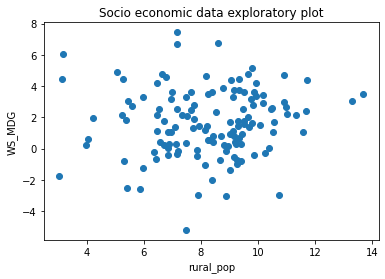

In [25]:
if socio_log_choice.value == 'None':
    plt.scatter(x = allsocio[socio_expl_choice.value], y = (allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Target':
    plt.scatter(x = allsocio[socio_expl_choice.value], y = np.log(allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Explanatory':
    plt.scatter(x = np.log(allsocio[socio_expl_choice.value]), y = (allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Both':
    plt.scatter(x = np.log(allsocio[socio_expl_choice.value]), y = np.log(allsocio[socio_trgt_choice.value]))
plt.xlabel(socio_expl_choice.value)
plt.ylabel(socio_trgt_choice.value)
plt.title('Socio economic data exploratory plot')

## Basic modelling

We will use some basic modelling techniques to whether there are any interesting behaviours in the data. Based on the exploratory plots, it would make sense to use the *log()* values for some of the variables, both explanatory and target, for some types of the modelling techniques.

### Compare clusters

Create the same number of clusters for the climate and socio economic data. See what countries are in the same clusters in both.

Need to perform some preprocessing first:
- Normalise the variables to N(0,1) using StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

In [27]:
noclusters = widgets.IntSlider(
    value=3,
    min=2,
    max=7,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

noclusters

IntSlider(value=3, continuous_update=False, description='Test:', max=7, min=2)

Choose the number of clusters to create.

In [42]:
impute = KNNImputer()
normalise = StandardScaler()
kmeans = KMeans(n_clusters=noclusters.value, init='k-means++', max_iter=1000)
spectral = SpectralClustering(n_clusters=noclusters.value, assign_labels='discretize', random_state=0)

kmeans_pipe = Pipeline([('norm', normalise), ('cluster', kmeans)])
cluster_pipe = Pipeline([('norm', normalise), ('cluster', spectral)])

kmeans_pipe.fit(allclimate.drop(allclimate.columns[[0, 7, 8, 9]], axis = 1))
kmeans_pred = kmeans_pipe.fit_predict(allclimate.drop(allclimate.columns[[0, 7, 8, 9]], axis = 1))
cluster_pipe.fit(allclimate.drop(allclimate.columns[[0, 7, 8, 9]], axis = 1))
spectral_pred = cluster_pipe.fit_predict(allclimate.drop(allclimate.columns[[0, 7, 8, 9]], axis = 1))

countries = list(allclimate['Country'])

kmeans_climate_clusters = list(zip(countries, kmeans_pred))
spectral_climate_clusters = list(zip(countries, spectral_pred))

kmeans_pipe = Pipeline([('impute', impute), ('norm', normalise), ('cluster', kmeans)])
spectral_pipe = Pipeline([('impute', impute), ('norm', normalise), ('cluster', spectral)])

kmeans_pipe.fit_transform(allsocio.drop(allsocio.columns[[0, 10, 11, 12]], axis = 1))
spectral_pipe.fit(allsocio.drop(allsocio.columns[[0, 10, 11, 12]], axis = 1))
kmeans_pred = kmeans_pipe.fit_predict(allsocio.drop(allsocio.columns[[0, 10, 11, 12]], axis = 1))
spectral_pred = spectral_pipe.fit_predict(allsocio.drop(allsocio.columns[[0, 10, 11, 12]], axis = 1))

countries = list(allsocio['Country'])

kmeans_socio_clusters = list(zip(countries, kmeans_pred))
spectral_socio_clusters = list(zip(countries, spectral_pred))

Now check which countries are in the together in the same clusters for the climate and socio economic factors.

In [43]:
km_climate_sets = []
km_socio_sets = []
for i in range(int(noclusters.value)):
    kmeans_climate_clusters = np.asarray(kmeans_climate_clusters)
    km_c = kmeans_climate_clusters[kmeans_climate_clusters[:, 1].astype(int) == i, 0]
    kmeans_socio_clusters = np.asarray(kmeans_socio_clusters)
    km_s = kmeans_socio_clusters[kmeans_socio_clusters[:, 1].astype(int) == i, 0]
    km_climate_sets.append(km_c)
    km_socio_sets.append(km_s)

Check which sets of countries are together in a cluster for both the climate and socio economic data.

In [47]:
common = []
for i in range(len(km_socio_sets)):
    for j in range(len(km_climate_sets)):
        temp = set.intersection(set(km_socio_sets[i]),set(km_climate_sets[j]))
        if len(temp) > 1:
            common.append(temp)

common

[{'BEL',
  'CHL',
  'DEU',
  'DNK',
  'ESP',
  'FIN',
  'FRA',
  'GBR',
  'GRC',
  'IRL',
  'ISL',
  'KOR',
  'LTU',
  'NOR',
  'NZL',
  'SVN',
  'SWE'},
 {'CAN', 'USA'},
 {'ARE',
  'AUS',
  'BHR',
  'CYP',
  'HUN',
  'ISR',
  'KWT',
  'LUX',
  'MLT',
  'NLD',
  'OMN',
  'QAT',
  'SAU'},
 {'AGO',
  'BFA',
  'CAF',
  'CIV',
  'CMR',
  'COD',
  'COG',
  'GAB',
  'GIN',
  'GNQ',
  'HTI',
  'MDG',
  'SLE',
  'TGO',
  'TZA'},
 {'AFG',
  'BEN',
  'DJI',
  'GHA',
  'GMB',
  'MLI',
  'MOZ',
  'MRT',
  'PAK',
  'SEN',
  'TCD',
  'YEM',
  'ZMB'},
 {'BGD',
  'BLZ',
  'BRB',
  'CRI',
  'DOM',
  'ECU',
  'FJI',
  'GRD',
  'GTM',
  'HND',
  'JAM',
  'LKA',
  'MDV',
  'MYS',
  'NIC',
  'PAN',
  'PHL',
  'SLV',
  'STP',
  'THA',
  'TTO',
  'VEN',
  'VNM'},
 {'ALB', 'ARM', 'BGR', 'KGZ', 'LVA', 'MNG', 'TUR'},
 {'COL', 'IDN', 'PER'},
 {'ARG',
  'AZE',
  'BOL',
  'BWA',
  'CPV',
  'DZA',
  'EGY',
  'IRN',
  'IRQ',
  'JOR',
  'LBY',
  'MAR',
  'MDA',
  'MEX',
  'NAM',
  'PRY',
  'ROU',
  'SYR',
  'TUN',
  

We can see some interesting resultswhen we set the number of clusters to 5. 

For example the following countries are together in the same clusters for both climate and soico economimc data:
- Colombia, Indonesia and Peru.
- Nepal and Tajikistan.
- Albania, Armenia, Bulgaria, Kyrzygstan, Latvia, Mongolia, and Turkey.


### Predictive modelling

We explored clusters now we can do some predictive modelling to see what happens then.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [71]:
impute = KNNImputer()
normalise = StandardScaler()
regression = LinearRegression()

climate_reg_pipe = Pipeline([('Imputer', impute), ('Standardise', normalise), ('Regression', regression)])
climate_reg_pipe.fit(allclimate.drop(allclimate.columns[[0, 7, 8, 9]], axis = 1), np.asarray(allclimate)[:, 7])
climate_reg_pipe.get_params('Regression')

{'memory': None,
 'steps': [('Imputer', KNNImputer()),
  ('Standardise', StandardScaler()),
  ('Regression', LinearRegression())],
 'verbose': False,
 'Imputer': KNNImputer(),
 'Standardise': StandardScaler(),
 'Regression': LinearRegression(),
 'Imputer__add_indicator': False,
 'Imputer__copy': True,
 'Imputer__metric': 'nan_euclidean',
 'Imputer__missing_values': nan,
 'Imputer__n_neighbors': 5,
 'Imputer__weights': 'uniform',
 'Standardise__copy': True,
 'Standardise__with_mean': True,
 'Standardise__with_std': True,
 'Regression__copy_X': True,
 'Regression__fit_intercept': True,
 'Regression__n_jobs': None,
 'Regression__normalize': False,
 'Regression__positive': False}